In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical

In [20]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

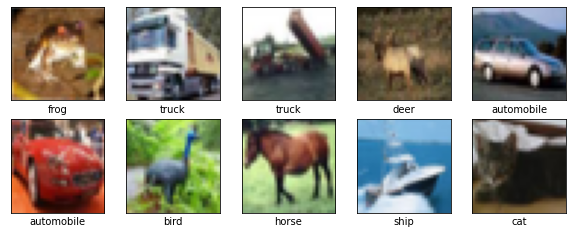

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, len(class_names))
y_test = to_categorical(y_test, len(class_names))


In [5]:
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=256)

Epoch 1/100
157/157 [==============================] - 4s 9ms/step - loss: 2.0884 - accuracy: 0.2594 - val_loss: 1.9903 - val_accuracy: 0.2933
Epoch 2/100
157/157 [==============================] - 1s 6ms/step - loss: 1.9046 - accuracy: 0.3301 - val_loss: 1.8950 - val_accuracy: 0.3135
Epoch 3/100
157/157 [==============================] - 1s 6ms/step - loss: 1.8313 - accuracy: 0.3568 - val_loss: 1.8560 - val_accuracy: 0.3552
Epoch 4/100
157/157 [==============================] - 1s 5ms/step - loss: 1.7853 - accuracy: 0.3736 - val_loss: 1.8254 - val_accuracy: 0.3633
Epoch 5/100
157/157 [==============================] - 1s 6ms/step - loss: 1.7495 - accuracy: 0.3846 - val_loss: 1.8450 - val_accuracy: 0.3210
Epoch 6/100
157/157 [==============================] - 1s 5ms/step - loss: 1.7216 - accuracy: 0.3971 - val_loss: 1.8435 - val_accuracy: 0.3385
Epoch 7/100
157/157 [==============================] - 1s 6ms/step - loss: 1.6959 - accuracy: 0.4044 - val_loss: 1.7582 - val_accuracy: 0.3741

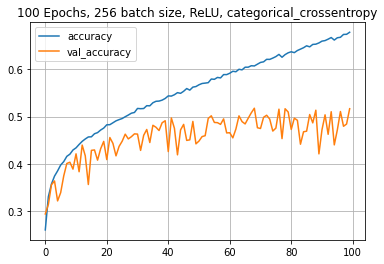

In [10]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.grid()
plt.title('100 Epochs, 256 batch size, ReLU, categorical_crossentropy')
plt.show()

313/313 [==============================] - 0s 2ms/step


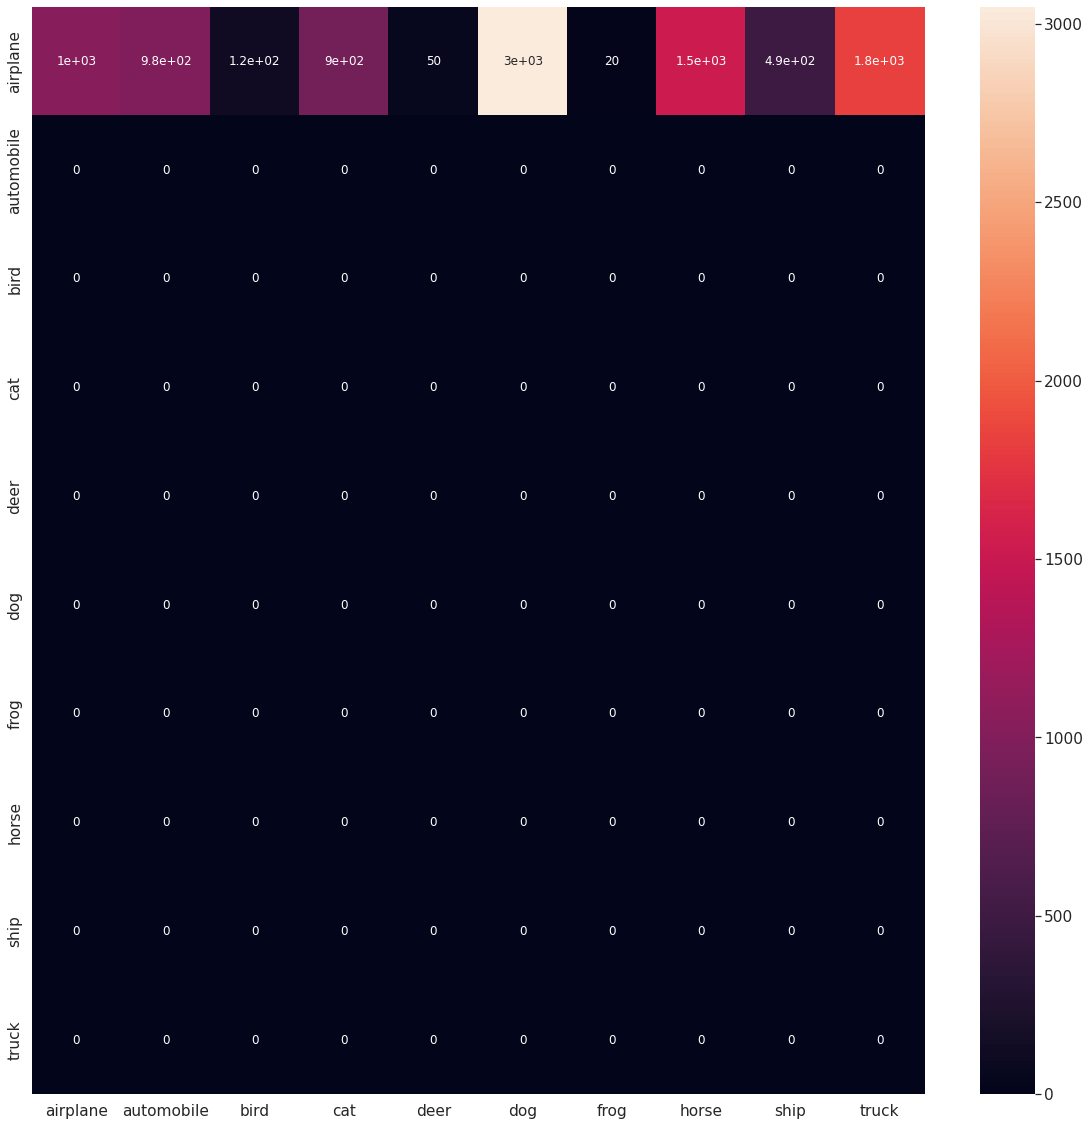

In [21]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, class_names, class_names)
plt.figure(figsize = (20,20))

sns.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()